# HOUSE PRICE PRIDICTION

### IMPORT REQUIRED LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import warnings
warnings.simplefilter("ignore")

### READING DATASET

In [2]:
dataset=sklearn.datasets.load_boston()

In [43]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [44]:
dir(dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

### CONVERTING TO DATAFRAME

In [5]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [47]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
df['price']=dataset.target

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### CHECKING NULL VALUES

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

### VISUALIZATION

<AxesSubplot:>

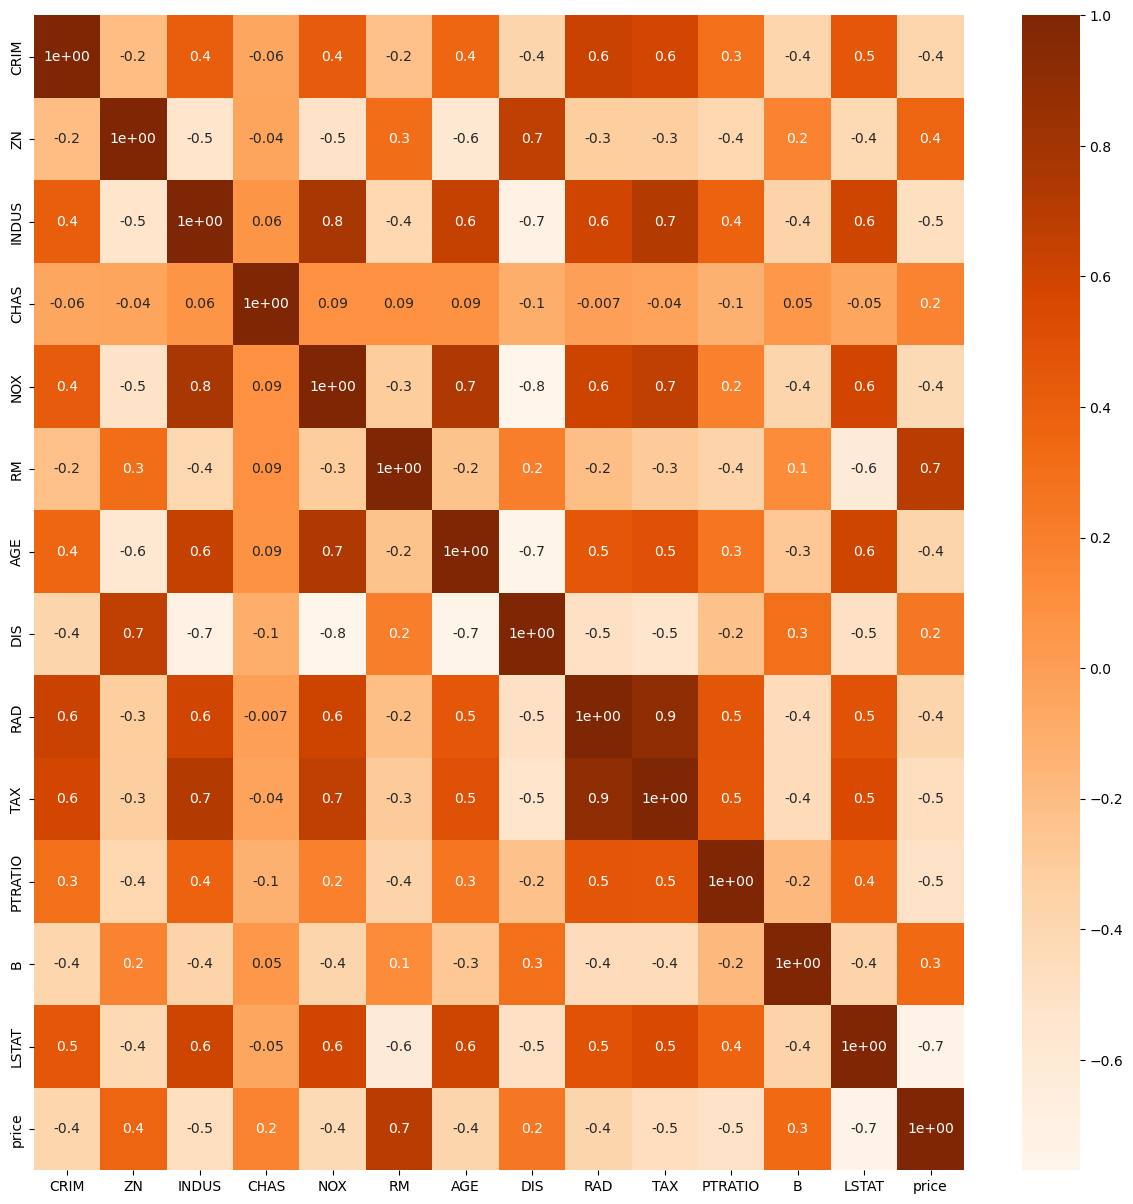

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='Oranges',annot=True,fmt='0.1',cbar=True)

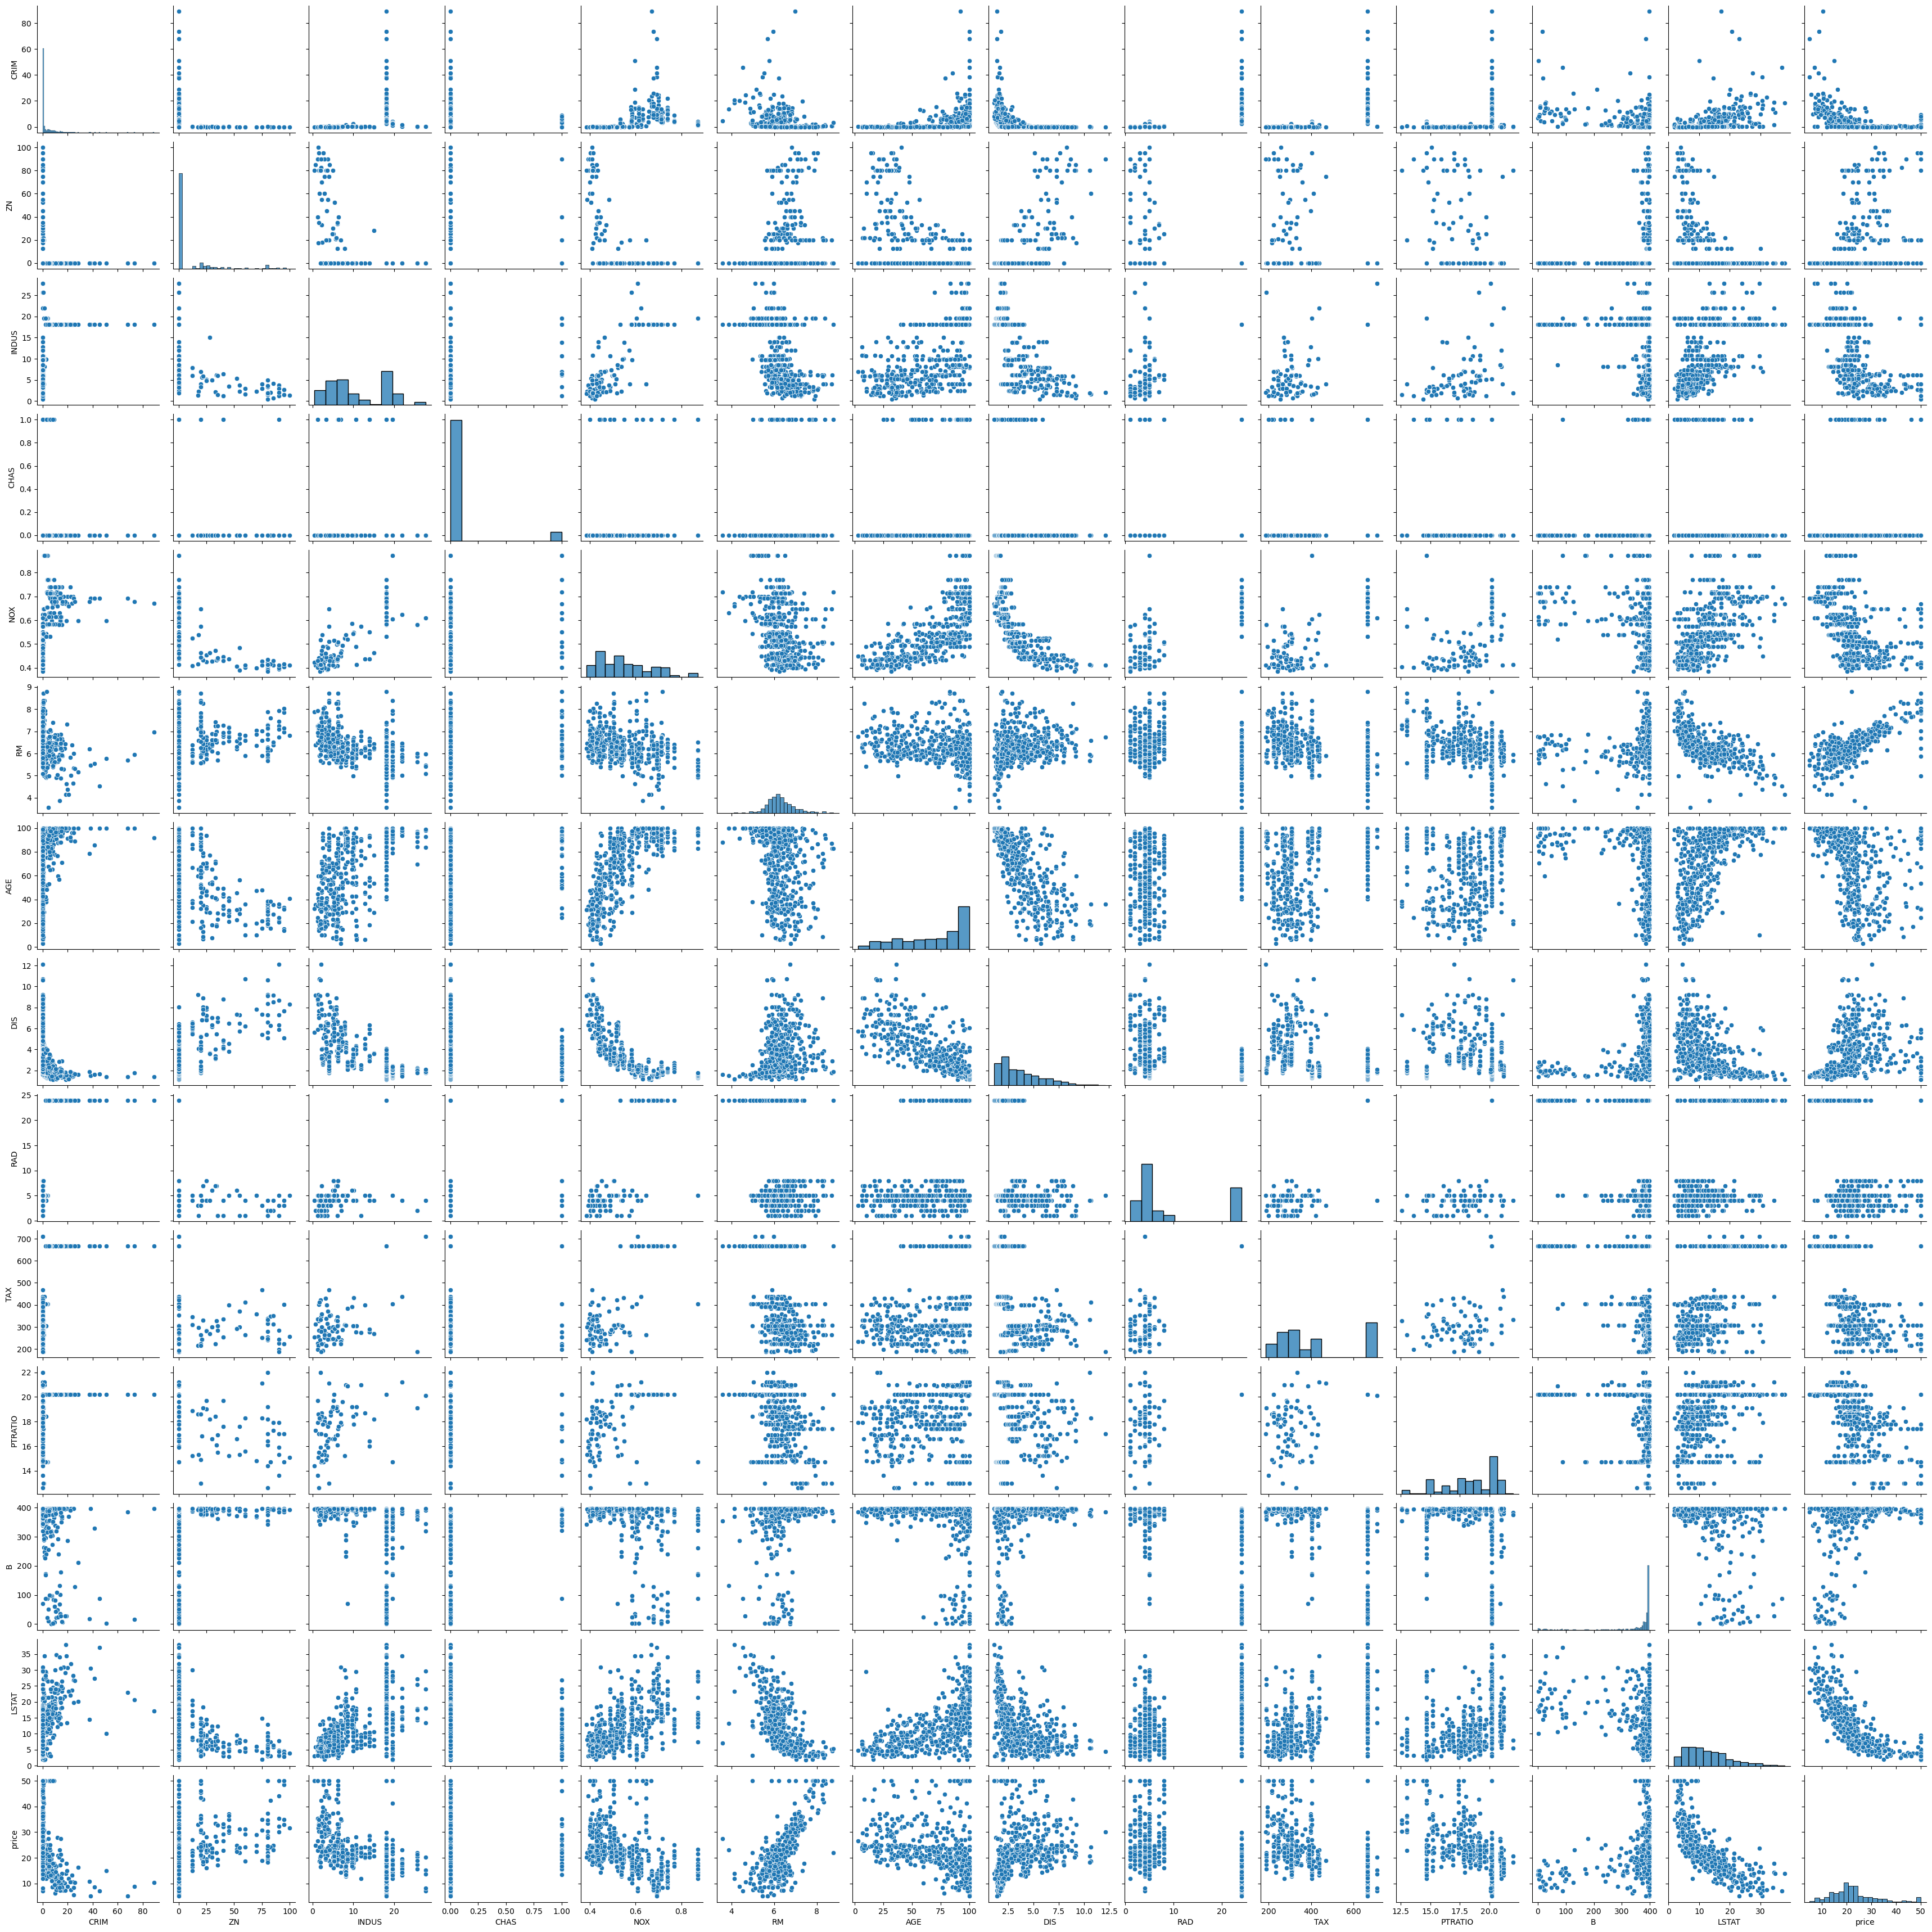

In [13]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='RAD', ylabel='price'>

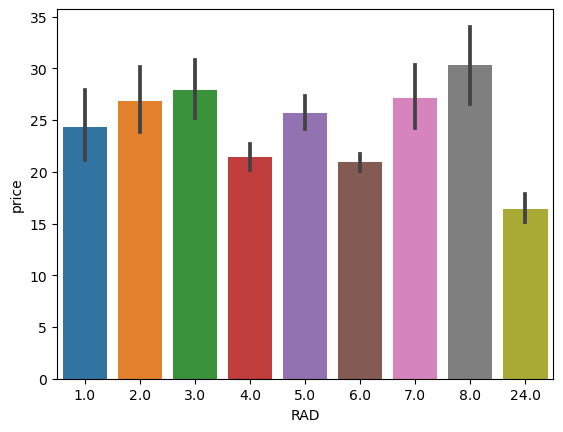

In [14]:
sns.barplot(x=df['RAD'],y=df['price'])

<AxesSubplot:xlabel='ZN', ylabel='price'>

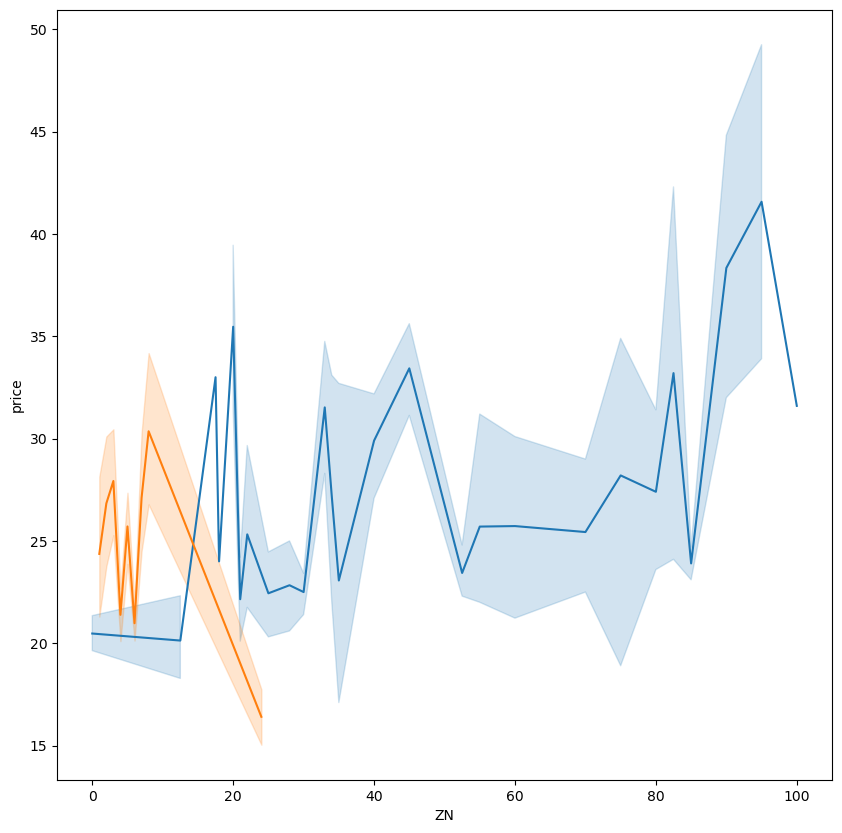

In [15]:
fig,ax=plt.subplots(figsize=(10,10))
sns.lineplot(x=df['ZN'],y=df['price'])
sns.lineplot(x=df['RAD'],y=df['price'])

In [16]:
x=df.drop(['price'],axis=1)

In [17]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
y=df['price']

In [19]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

### SPLITING DATASET

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [22]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
454,9.51363,0.0,18.10,0.0,0.7130,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71
471,4.03841,0.0,18.10,0.0,0.5320,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
281,0.03705,20.0,3.33,0.0,0.4429,6.968,37.2,5.2447,5.0,216.0,14.9,392.23,4.59
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
107,0.13117,0.0,8.56,0.0,0.5200,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,22.05110,0.0,18.10,0.0,0.7400,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
131,1.19294,0.0,21.89,0.0,0.6240,6.326,97.7,2.2710,4.0,437.0,21.2,396.90,12.26
249,0.19073,22.0,5.86,0.0,0.4310,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
152,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12


In [23]:
y_train

454    14.9
471    19.6
281    35.4
477    12.0
107    20.4
       ... 
440    10.5
131    19.6
249    26.2
152    15.3
362    20.8
Name: price, Length: 404, dtype: float64

In [49]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
224,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14
137,0.35233,0.0,21.89,0.0,0.6240,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59
453,8.24809,0.0,18.10,0.0,0.7130,7.393,99.3,2.4527,24.0,666.0,20.2,375.87,16.74
303,0.10000,34.0,6.09,0.0,0.4330,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86
254,0.04819,80.0,3.64,0.0,0.3920,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,13.91340,0.0,18.10,0.0,0.7130,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17
294,0.08199,0.0,13.92,0.0,0.4370,6.009,42.3,5.5027,4.0,289.0,16.0,396.90,10.40
306,0.07503,33.0,2.18,0.0,0.4720,7.420,71.9,3.0992,7.0,222.0,18.4,396.90,6.47
463,5.82115,0.0,18.10,0.0,0.7130,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29


In [50]:
y_test

224    44.8
137    17.1
453    17.8
303    33.1
254    21.9
       ... 
434    11.7
294    21.7
306    33.4
463    20.2
332    19.4
Name: price, Length: 102, dtype: float64

### LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model1=LinearRegression()

### TRAINING MODEL

In [26]:
model1.fit(x_train,y_train)

LinearRegression()

### PREDICTING VALUES

In [27]:
y1_pred=model1.predict(x_test)

### R2_SCORE

In [51]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,plot_confusion_matrix,roc_curve,auc

In [29]:
r2_score(y_test,y1_pred)

0.7952617563243858

In [30]:
mean_squared_error(y_test,y1_pred)

16.94307301383379

In [31]:
mean_absolute_error(y_test,y1_pred)

3.014250275240339

### XGBOOST

In [32]:
from xgboost import XGBRegressor

In [33]:
model2=XGBRegressor()

### TRAINING MODEL

In [34]:
xg=model2.fit(x_train,y_train)
xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### TESTING MODEL

In [35]:
y2_pred=model2.predict(x_test)

In [58]:
y2_pred

array([42.74622  , 19.78573  , 20.579105 , 32.79266  , 23.147135 ,
       21.640793 , 13.5511465,  7.9866385, 19.791334 , 17.194458 ,
       16.244421 , 32.253292 , 34.19664  , 25.787457 ,  7.003338 ,
       11.719117 , 21.318201 , 16.468893 , 12.669956 , 22.104694 ,
       22.134321 , 47.07059  , 22.810692 , 24.072947 , 12.311422 ,
       27.259499 , 18.567297 , 21.642921 , 20.705463 , 21.544579 ,
       14.354657 , 33.281105 , 20.685549 , 17.342514 , 17.56727  ,
       13.245988 , 23.825132 , 34.77503  , 18.561607 , 23.183676 ,
       16.394434 , 10.197184 , 20.75447  , 15.200618 , 20.092638 ,
       26.54555  , 21.025711 , 20.036818 , 25.879812 , 20.611343 ,
       26.816973 , 23.094099 , 49.18955  , 19.1513   , 22.06002  ,
       20.94343  , 48.06382  , 15.387839 , 29.111969 , 20.225601 ,
       22.29728  , 20.20981  , 33.013508 , 28.561848 , 16.92323  ,
       25.429798 , 36.950607 , 24.72117  , 27.07721  , 26.60588  ,
       24.435978 , 24.591536 , 11.865473 , 32.709236 ,  9.4146

In [36]:
y2_train=model2.predict(x_train)

In [37]:
r2_score(y_train,y2_train)

0.9999932849235356

In [60]:
print("r2_score of xg_boost:",r2_score(y_test,y2_pred))

r2_score of xg_boost: 0.9279456534913544


In [63]:
print("mae of xg_boost:",mean_absolute_error(y_test,y2_pred))

mae of xg_boost: 1.8196323572420603


### PREDICTING HOUSE PRICE

In [40]:
arr=np.array([9.51363,0.0,18.10,0.0,0.7130,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71]).reshape(1,-1)
print(arr.shape,x.shape)
print(arr)

(1, 13) (506, 13)
[[  9.51363   0.       18.1       0.        0.713     6.728    94.1
    2.4961   24.      666.       20.2       6.68     18.71   ]]


In [41]:
predict=xg.predict(arr)
predict

array([14.876002], dtype=float32)